In [285]:
# https://adventofcode.com/2018/day/17

function parseclay(line)
    if match(r"^x=", line) != nothing
        x, y1, y2 = parse.(Int, match(r"x=(\d+), y=(\d+)..(\d+)", line).captures)
        return [CartesianIndex(y + 1, x + 1) for y in y1:y2]
    else
        y, x1, x2 = parse.(Int, match(r"y=(\d+), x=(\d+)..(\d+)", line).captures)
        return [CartesianIndex(y + 1, x + 1) for x in x1:x2]
    end
end

data = open("17.txt", "r") do file
    readlines(file) .|> parseclay |> Iterators.flatten |> collect
end

const CLAY, SAND, FLOW, REST = convert.(Int, collect("#.|~"))


4-element Array{Int64,1}:
  35
  46
 124
 126

In [286]:
function fill(grid, start)
    y, x = start
    if y < size(grid, 1)
        # flow downward first, to fill in the current region 
        if grid[y + 1, x] == SAND
            grid[y + 1, x] = FLOW
            fill(grid, (y + 1, x))
        end
        
        # if we have reached a fill point or the top of a wall, flow to the left
        if grid[y + 1, x] in [CLAY, REST] && grid[y, x - 1] == SAND
            grid[y, x - 1] = FLOW
            fill(grid, (y, x - 1))
        end
        
        # if we have reached a fill point or the top of a wall, flow to the right
        if grid[y + 1, x] in [CLAY, REST] && grid[y, x + 1] == SAND
            grid[y, x + 1] = FLOW
            fill(grid, (y, x + 1))
        end

        # if we have clay walls on both sides, rest this whole row
        xl = x - 1
        xr = x + 1
        while grid[y, xl] ∉ [SAND, CLAY]
            xl -= 1
        end
        while grid[y, xr] ∉ [SAND, CLAY]
            xr += 1
        end
        if grid[y, xl] == CLAY && grid[y, xr] == CLAY
            grid[y, xl + 1:xr - 1] .= REST
        end
    end
end


fill (generic function with 1 method)

In [287]:
# part 1

xmin, xmax = extrema(x for (y, x) in Tuple.(data))
ymin, ymax = extrema(y for (y, x) in Tuple.(data))

grid = Array{Int}(undef, ymax, xmax) .= SAND
grid[data] .= CLAY

fill(grid, (ymin - 1, 501))

sum(grid .== FLOW) + sum(grid .== REST)


33362

In [288]:
# part 2

sum(grid .== REST)


27801

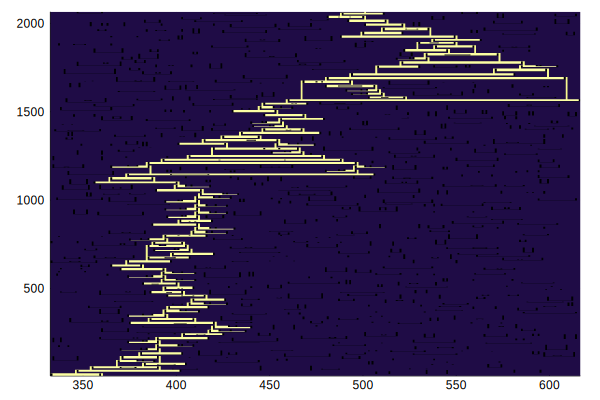

In [289]:
# visualization

import Plots

Plots.heatmap(xmin:xmax, 
              ymin:ymax, 
              reverse(grid[ymin:ymax, xmin:xmax], dims=1),
              legend=false)
